Libraries

In [1]:
import modin.pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import plotly.express as px
#import seaborn as sns


SWGO Radius

In [2]:
R_swgo = 300


def df_filterR(df):
    column = df['R']
    condition = column <= R_swgo
    return df[condition]


Function to filter 2 sigmas of the dataframe

In [3]:
def list_R_nmuons_nelectromagnetic(df):

    sigma = 34.1
    Nshowers = 1000

    emptylist_R = []
    emptylist_n_muons = []
    emptylist_n_electromagnetic = []

    for i in range(1, Nshowers+1):
        df_eventnum = df[df['Eventnum'] == i]
        if df_eventnum.size!=0:
            column = df_eventnum['R']
            Rsigma = np.percentile(column, sigma*2)

            condition = (column <= Rsigma)
            df2 = df_eventnum[condition]

            df_muons = df2[df2['Type'].isin([75, 76])]
            n_muons = len(df_muons)

            df_electromagnetic = df2[df2['Type'].isin([1, 2, 3])]
            n_electromagnetic = len(df_electromagnetic)

            emptylist_R.append(Rsigma)
            emptylist_n_muons.append(n_muons)
            emptylist_n_electromagnetic.append(n_electromagnetic)

    listR = np.array(emptylist_R)
    listn_muons = np.array(emptylist_n_muons)
    listn_electromagnetic = np.array(emptylist_n_electromagnetic)

    return [listR,listn_muons, listn_electromagnetic]

Dataframes 40 degrees list

In [4]:
dflist_FE = [
    pd.read_csv("./FE1TeV40DEGREE.txt", delim_whitespace=True), pd.read_csv("./FE5TeV40DEGREE.txt", delim_whitespace=True),
    pd.read_csv("./FE10TeV40DEGREE.txt", delim_whitespace=True), pd.read_csv("./FE50TeV40DEGREE.txt", delim_whitespace=True),
    pd.read_csv("./FE100TeV40DEGREE.txt", delim_whitespace=True), pd.read_csv("./FE500TeV40DEGREE.txt", delim_whitespace=True)
    ]

dflist_Photons = [
    pd.read_csv("./Photons1TeV40DEGREE.txt", delim_whitespace=True), pd.read_csv("./Photons5TeV40DEGREE.txt", delim_whitespace=True),
    pd.read_csv("./Photons10TeV40DEGREE.txt", delim_whitespace=True), pd.read_csv("./Photons50TeV40DEGREE.txt", delim_whitespace=True),
    pd.read_csv("./Photons100TeV40DEGREE.txt", delim_whitespace=True), pd.read_csv("./Photons500TeV40DEGREE.txt", delim_whitespace=True)
    ]

dflist_Protons = [ 
    pd.read_csv("./Protons1TeV40DEGREE.txt", delim_whitespace=True), pd.read_csv("./Protons5TeV40DEGREE.txt", delim_whitespace=True),
    pd.read_csv("./Protons10TeV40DEGREE.txt", delim_whitespace=True), pd.read_csv("./Protons50TeV40DEGREE.txt", delim_whitespace=True),
    pd.read_csv("./Protons100TeV40DEGREE.txt", delim_whitespace=True), pd.read_csv("./Protons500TeV40DEGREE.txt", delim_whitespace=True)
    ]


To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

(raylet) /home/adan12/anaconda3/envs/DataScienceP/lib/python3.9/site-packages/ray/dashboard/agent.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(raylet)   if LooseVersion(aiohttp.__version__) < LooseVersion("4.0.0"):
(raylet) /home/adan12/anaconda3/envs/DataScienceP/lib/python3.9/site-packages/ray/dashboard/agent.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(raylet)   if LooseVersion(aiohttp.__version__) < LooseVersion("4.0.0"):
(raylet) /home/adan12/anaconda3/envs/DataScienceP/lib/python3.9/site-packages/ray/dashboard/agent.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(raylet)   if LooseVersion(aiohttp.__version__) < LooseVersion("4.0.0"):


In [5]:
#Filter by Radius SWGO
dflist_FE = list(map(df_filterR, dflist_FE))
dflist_Photons = list(map(df_filterR, dflist_Photons))
dflist_Protons = list(map(df_filterR, dflist_Protons))

(raylet) /home/adan12/anaconda3/envs/DataScienceP/lib/python3.9/site-packages/ray/dashboard/agent.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(raylet)   if LooseVersion(aiohttp.__version__) < LooseVersion("4.0.0"):


In [6]:
list_R_nmuons_nelectromagnetic_FE = list(map(list_R_nmuons_nelectromagnetic, dflist_FE))
list_R_nmuons_nelectromagnetic_Photons = list(map(list_R_nmuons_nelectromagnetic, dflist_Photons))
list_R_nmuons_nelectromagnetic_Protons = list(map(list_R_nmuons_nelectromagnetic, dflist_Protons))

(raylet) /home/adan12/anaconda3/envs/DataScienceP/lib/python3.9/site-packages/ray/dashboard/agent.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(raylet)   if LooseVersion(aiohttp.__version__) < LooseVersion("4.0.0"):
2022-07-16 13:52:59,748	WARNING worker.py:1257 -- (ip=192.168.1.101) The agent on node pop-os failed to be restarted 5 times. There are 3 possible problems if you see this error.
  1. The dashboard might not display correct information on this node.
  2. Metrics on this node won't be reported.
  3. runtime_env APIs won't work.
Check out the `dashboard_agent.log` to see the detailed failure messages.
(raylet) E0716 13:52:59.741145265   12279 fork_posix.cc:76]           Other threads are currently calling into gRPC, skipping fork() handlers


In [7]:
#Obtencion de los datos
arraylist_R_sigmas_FE = []
for i in range(len(list_R_nmuons_nelectromagnetic_FE)):
    arraylist_R_sigmas_FE.append(list_R_nmuons_nelectromagnetic_FE[i][0])

arraylist_R_sigmas_Photons = []
for i in range(len(list_R_nmuons_nelectromagnetic_Photons)):
    arraylist_R_sigmas_Photons.append(list_R_nmuons_nelectromagnetic_Photons[i][0])

arraylist_R_sigmas_Protons = []
for i in range(len(list_R_nmuons_nelectromagnetic_Protons)):
    arraylist_R_sigmas_Protons.append(list_R_nmuons_nelectromagnetic_Protons[i][0])



arraylist_N_muons_sigmas_FE = []
for i in range(len(list_R_nmuons_nelectromagnetic_FE)):
    arraylist_N_muons_sigmas_FE.append(list_R_nmuons_nelectromagnetic_FE[i][1])

arraylist_N_muons_sigmas_Photons = []
for i in range(len(list_R_nmuons_nelectromagnetic_Photons)):
    arraylist_N_muons_sigmas_Photons.append(list_R_nmuons_nelectromagnetic_Photons[i][1])

arraylist_N_muons_sigmas_Protons = []
for i in range(len(list_R_nmuons_nelectromagnetic_Protons)):
    arraylist_N_muons_sigmas_Protons.append(list_R_nmuons_nelectromagnetic_Protons[i][1])




arraylist_N_electromagnetic_sigmas_FE = []
for i in range(len(list_R_nmuons_nelectromagnetic_FE)):
    arraylist_N_electromagnetic_sigmas_FE.append(list_R_nmuons_nelectromagnetic_FE[i][2])

arraylist_N_electromagnetic_sigmas_Photons = []
for i in range(len(list_R_nmuons_nelectromagnetic_Photons)):
    arraylist_N_electromagnetic_sigmas_Photons.append(list_R_nmuons_nelectromagnetic_Photons[i][2])

arraylist_N_electromagnetic_sigmas_Protons = []
for i in range(len(list_R_nmuons_nelectromagnetic_Protons)):
    arraylist_N_electromagnetic_sigmas_Protons.append(list_R_nmuons_nelectromagnetic_Protons[i][2])

Plot average Radius 40 DEGREES

In [40]:
meanRlistFE = list(map(np.mean, arraylist_R_sigmas_FE))
meanRlistPhotons = list(map(np.mean, arraylist_R_sigmas_Photons))
meanRlistProtons = list(map(np.mean, arraylist_R_sigmas_Protons))

stdRlistFE = list(map(np.std, arraylist_R_sigmas_FE))
stdRlistPhotons = list(map(np.std, arraylist_R_sigmas_Photons))
stdRlistProtons = list(map(np.std, arraylist_R_sigmas_Protons))

In [41]:
np.savetxt('meanRlistFE40.txt', meanRlistFE , delimiter =', ')
np.savetxt('meanRlistPhotons40.txt', meanRlistPhotons , delimiter =', ') 
np.savetxt('meanRlistProtons40.txt', meanRlistProtons , delimiter =', ') 
np.savetxt('stdRlistFE40.txt', stdRlistFE , delimiter =', ') 
np.savetxt('stdRlistPhotons40.txt', stdRlistPhotons , delimiter =', ')
np.savetxt('stdRlistProtons40.txt', stdRlistProtons , delimiter =', ') 

In [43]:
meanRlistFE = np.loadtxt('meanRlistFE40.txt')
meanRlistPhotons = np.loadtxt('meanRlistPhotons40.txt') 
meanRlistProtons = np.loadtxt('meanRlistProtons40.txt') 
stdRlistFE = np.loadtxt('stdRlistFE40.txt') 
stdRlistPhotons = np.loadtxt('stdRlistPhotons40.txt')
stdRlistProtons = np.loadtxt('stdRlistProtons40.txt') 

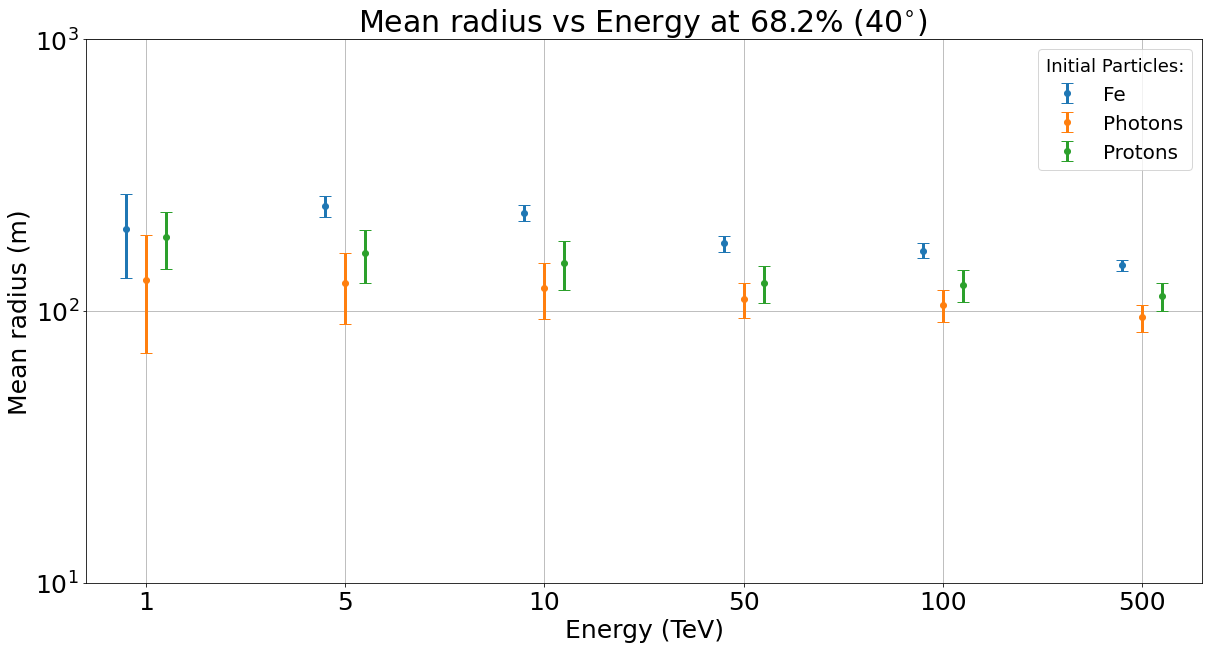

In [44]:
# Labels of X axis
X = ["1", "5", "10", "50", "100", "500"]

# Positions of X axis
X_axis = np.arange(len(X))

# Plot Errorbar of the DATA
plt.errorbar(X_axis-0.10, meanRlistFE,  # X (Positions of X axis), Y (Dates data mean)
             fmt='o', elinewidth=3, capsize=6,  # Manipulate the errorbar
             yerr=stdRlistFE,  # Error
             label='Fe', linestyle='')  # Label and linestyle

plt.errorbar(X_axis+0.0, meanRlistPhotons,
             fmt='o', elinewidth=3, capsize=6,
             yerr=stdRlistPhotons,
             label='Photons', linestyle='')

plt.errorbar(X_axis+0.10, meanRlistProtons,
             fmt='o', elinewidth=3, capsize=6,
             yerr=stdRlistProtons,
             label='Protons', linestyle='')

# Configure the PLOT
plt.xticks(X_axis, X, size=25)
plt.yticks(size=25)

plt.xlabel("Energy (TeV)", fontsize=25)
plt.ylabel("Mean radius (m)", fontsize=25)

plt.title("Mean radius vs Energy at 68.2% ($40^{\circ}$) ", fontsize=30)
plt.legend(fontsize=20, title='Initial Particles:',  title_fontsize=18)

# Configure the scale of the PLOT
plt.xlim(-3E-1, 5.3E0)
# plt.xlim(2.5E-1,6E2)
plt.ylim( 1E1, 1E3)
# plt.xscale('symlog')
plt.yscale('symlog')
plt.rcParams["figure.figsize"] = 20, 10
plt.grid()
plt.show()


Plot average number of Muons particles 40 DEGREES

In [48]:
# Mean muon + Antimuon 40 Degree of muons particles ->  Etiqueta 75 y 76
mean_muon_listFE=list(map(np.mean, arraylist_N_muons_sigmas_FE))
mean_muon_listPhotons=list(map(np.mean, arraylist_N_muons_sigmas_Photons))
mean_muon_listProtons=list(map(np.mean, arraylist_N_muons_sigmas_Protons))

std_muon_listFE=list(map(np.std, arraylist_N_muons_sigmas_FE))
std_muon_listPhotons=list(map(np.std, arraylist_N_muons_sigmas_Photons))
std_muon_listProtons=list(map(np.std, arraylist_N_muons_sigmas_Protons))

In [49]:
np.savetxt('mean_muon_listFE40.txt', mean_muon_listFE , delimiter =', ')
np.savetxt('mean_muon_listPhotons40.txt', mean_muon_listPhotons , delimiter =', ') 
np.savetxt('mean_muon_listProtons40.txt', mean_muon_listProtons , delimiter =', ') 
np.savetxt('std_muon_listFE40.txt', std_muon_listFE , delimiter =', ') 
np.savetxt('std_muon_listPhotons40.txt', std_muon_listPhotons , delimiter =', ')
np.savetxt('std_muon_listProtons40.txt', std_muon_listProtons , delimiter =', ') 

In [50]:
mean_muon_listFE = np.loadtxt('mean_muon_listFE40.txt')
mean_muon_listPhotons = np.loadtxt('mean_muon_listPhotons40.txt') 
mean_muon_listProtons = np.loadtxt('mean_muon_listProtons40.txt') 
std_muon_listFE = np.loadtxt('std_muon_listFE40.txt') 
std_muon_listPhotons = np.loadtxt('std_muon_listPhotons40.txt')
std_muon_listProtons = np.loadtxt('std_muon_listProtons40.txt') 

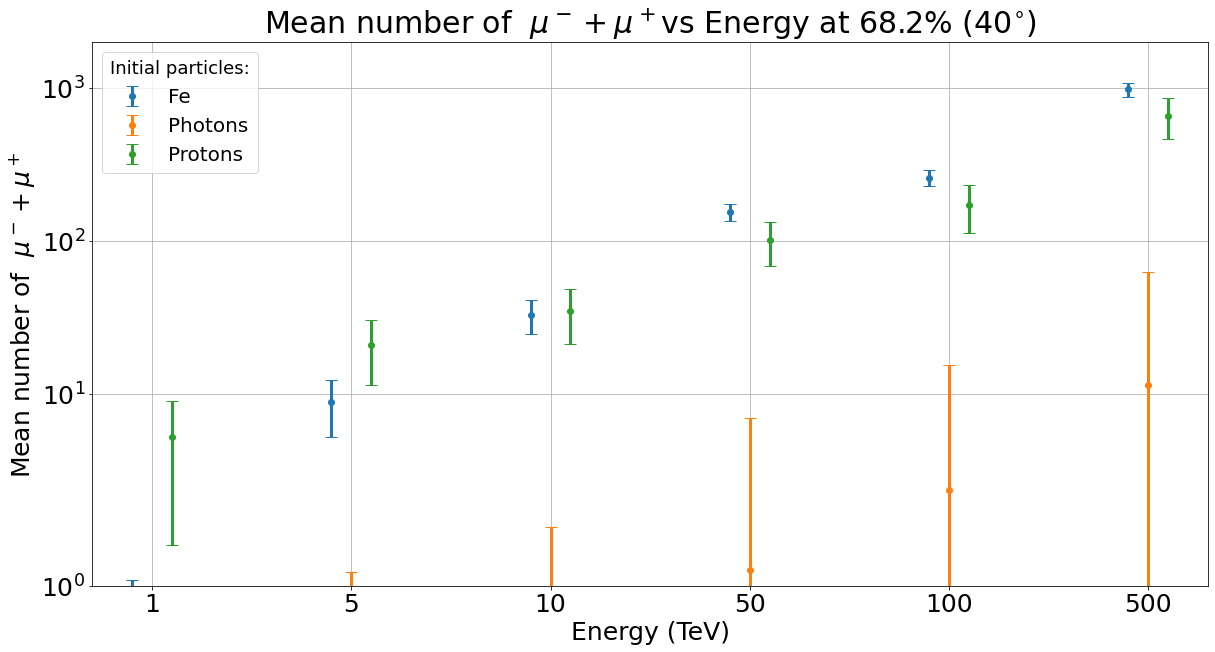

In [27]:
# Labels of X axis
X = ["1", "5", "10", "50", "100", "500"]

# Positions of X axis
X_axis = np.arange(len(X))

# Plot Errorbar of the DATA
plt.errorbar(X_axis-0.10, mean_muon_listFE,  # X (Positions of X axis), Y (Dates data average)
             fmt='o', elinewidth=3, capsize=6,  # Manipulate the errorbar
             yerr=std_muon_listFE,  # Error
             label='Fe', linestyle='')  # Label and linestyle

plt.errorbar(X_axis+0.0, mean_muon_listPhotons,
             fmt='o', elinewidth=3, capsize=6,
             yerr=std_muon_listPhotons,
             label='Photons', linestyle='')

plt.errorbar(X_axis+0.10, mean_muon_listProtons,
             fmt='o', elinewidth=3, capsize=6,
             yerr=std_muon_listProtons,
             label='Protons', linestyle='')

# Configure the PLOT
plt.xticks(X_axis, X, size=25)
plt.yticks(size=25)

plt.xlabel("Energy (TeV)", fontsize=25)
plt.ylabel("Mean number of  $\mu^-+\mu^+$", fontsize=25)

plt.title(
    "Mean number of  $\mu^-+\mu^+$vs Energy at 68.2% ($40^{\circ}$)", fontsize=30)
plt.legend(fontsize=20, title='Initial particles:', title_fontsize=18)

# Configure the scale of the PLOT
plt.xlim(-3E-1, 5.3E0)
plt.ylim(1E0, 2E3)
# plt.xscale('log')
plt.yscale('symlog')

plt.rcParams["figure.figsize"] = 20, 10
plt.grid()

plt.show()


Plot average number of Electromagnetic particles 40 DEGREES

In [51]:
# Mean of the number Electromagnetic particles 40 Degree ->  Etiqueta 1,2,3
mean_electromagnetic_listFE=list(map(np.mean, arraylist_N_electromagnetic_sigmas_FE))
mean_electromagnetic_listPhotons=list(map(np.mean, arraylist_N_electromagnetic_sigmas_Photons))
mean_electromagnetic_listProtons=list(map(np.mean, arraylist_N_electromagnetic_sigmas_Protons))

std_electromagnetic_listFE=list(map(np.std, arraylist_N_electromagnetic_sigmas_FE))
std_electromagnetic_listPhotons=list(map(np.std, arraylist_N_electromagnetic_sigmas_Photons))
std_electromagnetic_listProtons=list(map(np.std, arraylist_N_electromagnetic_sigmas_Protons))

In [52]:
np.savetxt('mean_electromagnetic_listFE40.txt', mean_electromagnetic_listFE , delimiter =', ')
np.savetxt('mean_electromagnetic_listPhotons40.txt', mean_electromagnetic_listPhotons , delimiter =', ') 
np.savetxt('mean_electromagnetic_listProtons40.txt', mean_electromagnetic_listProtons , delimiter =', ') 
np.savetxt('std_electromagnetic_listFE40.txt', std_electromagnetic_listFE , delimiter =', ') 
np.savetxt('std_electromagnetic_listPhotons40.txt', std_electromagnetic_listPhotons , delimiter =', ')
np.savetxt('std_electromagnetic_listProtons40.txt', std_electromagnetic_listProtons , delimiter =', ') 

In [3]:
mean_electromagnetic_listFE = np.loadtxt('mean_electromagnetic_listFE40.txt')
mean_electromagnetic_listPhotons = np.loadtxt('mean_electromagnetic_listPhotons40.txt') 
mean_electromagnetic_listProtons = np.loadtxt('mean_electromagnetic_listProtons40.txt') 
std_electromagnetic_listFE = np.loadtxt('std_electromagnetic_listFE40.txt') 
std_electromagnetic_listPhotons = np.loadtxt('std_electromagnetic_listPhotons40.txt')
std_electromagnetic_listProtons = np.loadtxt('std_electromagnetic_listProtons40.txt') 

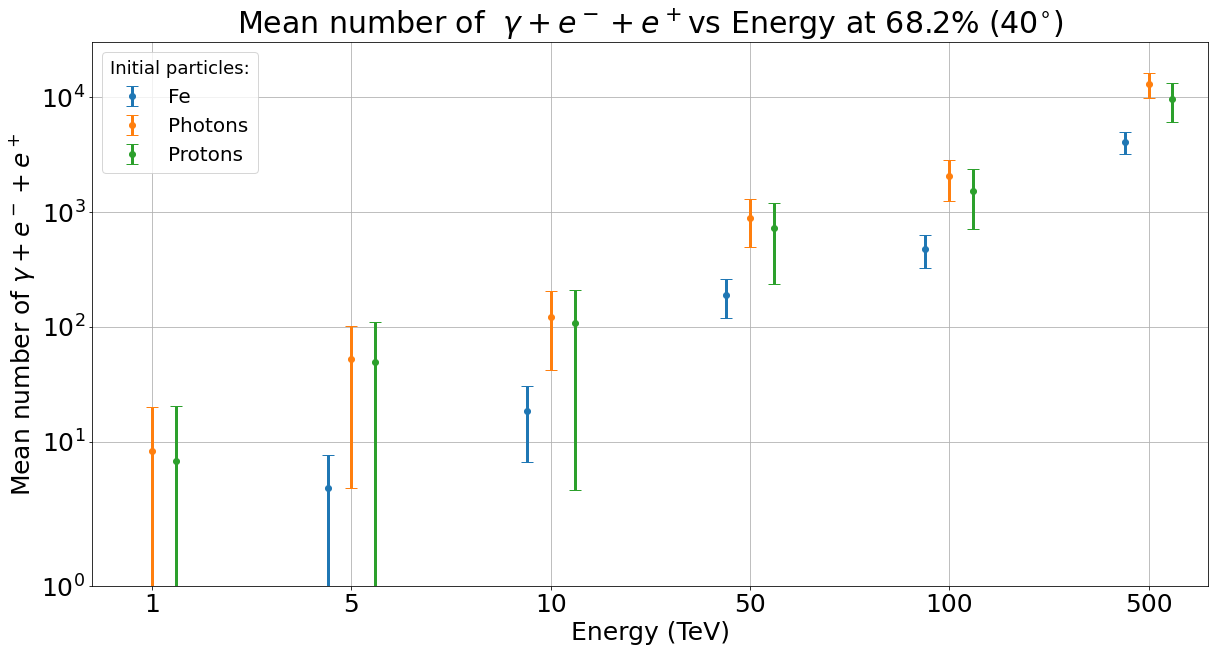

In [5]:
# Labels of X axis
X = ["1", "5", "10", "50", "100", "500"]

# Positions of X axis
X_axis = np.arange(len(X))

# Plot Errorbar of the DATA
plt.errorbar(X_axis-0.12, mean_electromagnetic_listFE,  # X (Positions of X axis), Y (Dates data average)
             fmt='o', elinewidth=3, capsize=6,  # Manipulate the errorbar
             yerr=std_electromagnetic_listFE,  # Error
             label='Fe', linestyle='')  # Label and linestyle

plt.errorbar(X_axis+0.0, mean_electromagnetic_listPhotons,
             fmt='o', elinewidth=3, capsize=6,
             yerr=std_electromagnetic_listPhotons,
             label='Photons', linestyle='')

plt.errorbar(X_axis+0.12, mean_electromagnetic_listProtons,
             fmt='o', elinewidth=3, capsize=6,
             yerr=std_electromagnetic_listProtons,
             label='Protons', linestyle='')


# Configure the PLOT
plt.xticks(X_axis, X, size=25)
plt.yticks(size=25)

plt.xlabel("Energy (TeV)", fontsize=25)
plt.ylabel("Mean number of $\gamma+e^-+e^+$", fontsize=25)

plt.title(
    "Mean number of  $\gamma+e^-+e^+$vs Energy at 68.2% ($40^{\circ}$)", fontsize=30)
plt.legend(fontsize=20, title='Initial particles:', title_fontsize=18)

# Configure the scale of the PLOT
plt.xlim(-3E-1, 5.3E0)
plt.ylim(1E0, 3E4)
# plt.xscale('symlog')
plt.yscale('symlog')

plt.rcParams["figure.figsize"] = 20, 10
plt.grid()

plt.show()
